In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

SEED = 2712

2.0.0-beta1


In [4]:
with np.load("/data/kmnist-train-imgs.npz") as img_container, \
     np.load("/data/kmnist-train-labels.npz") as labels_container:
    images = img_container["arr_0"]
    labels = labels_container["arr_0"]

In [5]:
assert images.shape[0] == labels.shape[0]

In [6]:
kmnist_ds = tf.data.Dataset.from_tensor_slices((images, labels))

In [10]:
kmnist_ds = kmnist_ds.shuffle(70000, seed=SEED)

W0624 02:11:45.432312 139833587656512 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/data/util/random_seed.py:58: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
kmnist_train_ds = kmnist_ds.skip(1000)
kmnist_dev_ds = kmnist_ds.take(1000)

label: 6 with image in shapes (28, 28)


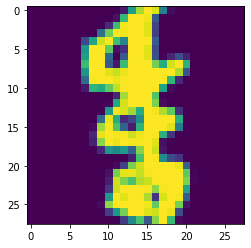

In [16]:
for x, y in kmnist_dev_ds:
    print(f"label: {y} with image in shapes {x.shape}")
    plt.imshow(x)
    break

In [17]:
def _bytes_feature(value):
  """Returns a bytes_list from a string / byte."""
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
  """Returns a float_list from a float / double."""
  return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
  """Returns an int64_list from a bool / enum / int / uint."""
  return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))


In [18]:
for x, y in kmnist_dev_ds:
    img_example = x
    label_example = y
    break

In [67]:
y.numpy()

6

In [47]:
x;

In [49]:
serialized_tensor = tf.io.serialize_tensor(x)

In [50]:
feature = _bytes_feature(serialized_tensor.numpy())

In [51]:
feature_proto = feature.SerializeToString()

In [59]:
feature_proto

b'\n\xa2\x06\n\x9f\x06\x08\x04\x12\x08\x12\x02\x08\x1c\x12\x02\x08\x1c"\x90\x06\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x12\x8e\xde\xff\xf2p\t\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0c\xab\xff\xff\xfaG\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x1e\xaf\xfb\xff\xff\xf34\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00^\xc8\xfe\xf9\xff\xff\xf3.\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x008\x97\xec\xfd\xb2u\xff\xff\xffI\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x87\xff\xff\xc1\x0b#\xff\xff\xf38\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x91\xff\xffX\x00H\xfe\xff\xf4?\x02\x1a>\x18\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xae\xff\xfeG\x10\xae\xff\xff\xff\xca\x9e\xee\xff\xa4\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x84\xff\xff\xf4\xe9\xf8\xff\xff\xff\xff\xfe

In [60]:
tf_feature_proto = tf.reshape(feature_proto, ())

In [62]:
type(tf_feature_proto)

tensorflow.python.framework.ops.EagerTensor

In [54]:
feature_description = {
    'image_raw': tf.io.FixedLenFeature([], tf.string, default_value=''),
}

In [65]:
tf.io.parse_example(tf_feature_proto.numpy(), feature_description)

InvalidArgumentError: Expected serialized to be a vector, got shape: [] [Op:ParseExample]

In [68]:
kmnist_train_ds

<SkipDataset shapes: ((28, 28), ()), types: (tf.uint8, tf.uint8)>